In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
df_log$first_timestamp <- as.POSIXct(df_log$first_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- as.numeric(df_log$first_timestamp)

df_log <- df_log %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()

head(df_log)
tail(df_log)

uid                                 
1 ad5ee348-1fd7-4dcc-85bc-67da2d28234e
2 ad5ee348-1fd7-4dcc-85bc-67da2d28234e
3 ad5ee348-1fd7-4dcc-85bc-67da2d28234e
4 ad5ee348-1fd7-4dcc-85bc-67da2d28234e
5 ad5ee348-1fd7-4dcc-85bc-67da2d28234e
6 ab7652f5-ad30-4ace-8e43-fff884228f99
  name                                         function_name   
1 wskowdev-invoker-00-6-guest-imageprocessing  imageprocessing 
2 wskowdev-invoker-00-6-guest-imageprocessing  imageprocessing 
3 wskowdev-invoker-00-6-guest-imageprocessing  imageprocessing 
4 wskowdev-invoker-00-6-guest-imageprocessing  imageprocessing 
5 wskowdev-invoker-00-6-guest-imageprocessing  imageprocessing 
6 wskowdev-invoker-00-7-guest-imageprocessing2 imageprocessing2
  first_timestamp     last_timestamp       reason    node        
1 2021-06-09 21:56:11 2021-06-09T21:56:11Z Scheduled             
2 2021-06-09 21:56:12 2021-06-09T21:56:12Z Pulling   kind-worker2
3 2021-06-09 21:56:55 2021-06-09T21:56:55Z Pulled    kind-worker2
4 2021-06-09 21:56:57 2021-06-09T21:56:57Z Created   kind-worker2
5 2021-06-09 21:56:57 2021-06-09T21:56:57Z Started   kind-worker2
6 2021-06-09 21:57:01 2021-06-09T21:57:01Z Scheduled             
  message                                                                                     
1 Successfully assigned openwhisk/wskowdev-invoker-00-6-guest-imageprocessing to kind-worker2 
2 Pulling image "andersonandrei/python3action:image_processing"                               
3 Successfully pulled image "andersonandrei/python3action:image_processing" in 43.046611689s  
4 Created container user-action                                                               
5 Started container user-action                                                               
6 Successfully assigned openwhisk/wskowdev-invoker-00-7-guest-imageprocessing2 to kind-worker2
  timestamp  min_timestamp
1 1623268571 1623268571   
2 1623268572 1623268571   
3 1623268615 1623268571   
4 1623268617 1623268571   
5 1623268617 1623268571   
6 1623268621 1623268621

uid                                 
1 ed865625-abd2-43c6-b809-ce39852e2570
2 ed865625-abd2-43c6-b809-ce39852e2570
3 738cc20d-9622-4874-99fd-2741ec4e5134
4 738cc20d-9622-4874-99fd-2741ec4e5134
5 738cc20d-9622-4874-99fd-2741ec4e5134
6 738cc20d-9622-4874-99fd-2741ec4e5134
  name                                      function_name first_timestamp    
1 wskowdev-invoker-00-10-guest-rnngenerate  rnngenerate   2021-06-09 22:01:30
2 wskowdev-invoker-00-10-guest-rnngenerate  rnngenerate   2021-06-09 22:01:30
3 wskowdev-invoker-00-11-guest-rnngenerate2 rnngenerate2  2021-06-09 22:01:31
4 wskowdev-invoker-00-11-guest-rnngenerate2 rnngenerate2  2021-06-09 22:01:32
5 wskowdev-invoker-00-11-guest-rnngenerate2 rnngenerate2  2021-06-09 22:01:32
6 wskowdev-invoker-00-11-guest-rnngenerate2 rnngenerate2  2021-06-09 22:01:32
  last_timestamp       reason    node        
1 2021-06-09T22:01:30Z Created   kind-worker2
2 2021-06-09T22:01:30Z Started   kind-worker2
3 2021-06-09T22:01:31Z Scheduled             
4 2021-06-09T22:01:32Z Pulled    kind-worker2
5 2021-06-09T22:01:32Z Created   kind-worker2
6 2021-06-09T22:01:32Z Started   kind-worker2
  message                                                                                               
1 Created container user-action                                                                         
2 Started container user-action                                                                         
3 Successfully assigned openwhisk/wskowdev-invoker-00-11-guest-rnngenerate2 to kind-worker2             
4 Container image "andersonandrei/python3action:rnn_generate_character_level" already present on machine
5 Created container user-action                                                                         
6 Started container user-action                                                                         
  timestamp  min_timestamp
1 1623268890 1623268883   
2 1623268890 1623268883   
3 1623268891 1623268891   
4 1623268892 1623268891   
5 1623268892 1623268891   
6 1623268892 1623268891

In [3]:
df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
summary(df_activations)

  object_uid        object_name        function_name         duration       
 Length:16          Length:16          Length:16          Min.   :0.004553  
 Class :character   Class :character   Class :character   1st Qu.:0.007900  
 Mode  :character   Mode  :character   Mode  :character   Median :0.012554  
                                                          Mean   :0.721571  
                                                          3rd Qu.:0.771825  
                                                          Max.   :3.072743  
    reason            node         message       
 Length:16          Mode:logical   Mode:logical  
 Class :character   NA's:16        NA's:16       
 Mode  :character                                
                                                 
                                                 
                                                 

In [4]:
df_filtered <- df_log %>%
    filter(
      #reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' )

df_selected <- df_filtered %>%
    mutate(duration = abs(timestamp - min_timestamp)) %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -timestamp)

summary(df_selected)

df_spread <- df_selected %>%
    group_by_at(vars(-duration)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, duration) %>%
    select(-sample_id) %>%
    mutate(
        Created = replace_na(Created,0),
        Pulled = replace_na(Pulled,0),
        #Pulling = replace_na(Pulling,0),
        Started = replace_na(Started,0))

df_processed <- df_spread %>%
    group_by(function_name) %>%
    mutate(
        #container_image_downloading = abs(Pulled - Pulling),
        container_image_creation = abs(Created - Pulled),
        container_initialization = abs(Started - Created)) %>%
    select(
        function_name,
        node,
        #container_image_downloading,
        container_image_creation,
        container_initialization)

 function_name         reason              node              duration    
 Length:21          Length:21          Length:21          Min.   : 0.00  
 Class :character   Class :character   Class :character   1st Qu.: 1.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 1.00  
                                                          Mean   : 8.81  
                                                          3rd Qu.: 7.00  
                                                          Max.   :46.00  

'data.frame':	16 obs. of  5 variables:
 $ function_name: chr  "rnngenerate2" "rnngenerate2" "rnngenerate" "rnngenerate" ...
 $ duration     : num  0.01236 0.00784 0.01274 0.00789 0.00455 ...
 $ reason       : chr  "download_data" "function_execution" "download_data" "function_execution" ...
 $ node         : logi  NA NA NA NA NA NA ...
 $ object_uid   : chr  "255ed9b0f5fc44ab9ed9b0f5fc94aba0" "255ed9b0f5fc44ab9ed9b0f5fc94aba0" "b6a281d621ff4ceca281d621ff9cec8a" "b6a281d621ff4ceca281d621ff9cec8a" ...


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



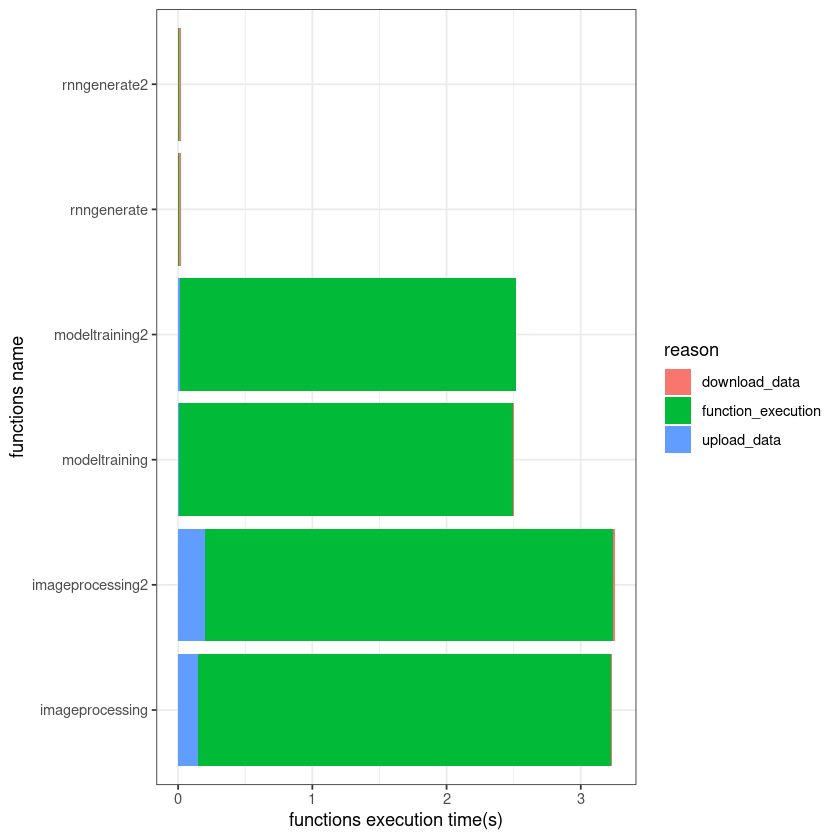

In [5]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        duration,
        reason,
        node,
        object_uid) #%>%
        #mutate(duration = (duration / 1000) %% 60)

str(df_activations_selected)
df_plot <- df_activations_selected

ggplot(data = df_plot) +
   geom_bar(aes(x = duration, y = function_name, fill = reason),stat='identity')  +
   labs(x = "functions execution time(s)", y = "functions name") +
   theme_bw() +
   ggsave('activations_bar_plot.png')

ggplot(data = df_plot) +
   geom_point(aes(x = duration, y = function_name, color = reason),stat='identity')  +
   labs(x = "functions execution time(s)", y = "functions name") +
   theme_bw() +
   ggsave('activations_point_plot.png')

In [6]:
head(df_activations)
df_activations_selected <- df_activations %>%
    select(
       object_uid,
       function_name,
       duration,
       reason) #%>%
    #mutate(duration = (duration / 1000) %% 60)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-duration)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, duration) %>%
   select(-sample_id)

summary(df_spread_activations)
head(df_spread_activations)
tail(df_spread_activations)

object_uid                       object_name    function_name  duration   
1 255ed9b0f5fc44ab9ed9b0f5fc94aba0 rnngenerate2   rnngenerate2   0.012364864
2 255ed9b0f5fc44ab9ed9b0f5fc94aba0 rnngenerate2   rnngenerate2   0.007839680
3 b6a281d621ff4ceca281d621ff9cec8a rnngenerate    rnngenerate    0.012743473
4 b6a281d621ff4ceca281d621ff9cec8a rnngenerate    rnngenerate    0.007890463
5 01ca5eeebfb7441a8a5eeebfb7b41a1a modeltraining2 modeltraining2 0.004552841
6 01ca5eeebfb7441a8a5eeebfb7b41a1a modeltraining2 modeltraining2 2.499029398
  reason             node message
1 download_data      NA   NA     
2 function_execution NA   NA     
3 download_data      NA   NA     
4 function_execution NA   NA     
5 download_data      NA   NA     
6 function_execution NA   NA

  object_uid        function_name      download_data      function_execution
 Length:6           Length:6           Min.   :0.004553   Min.   :0.00784   
 Class :character   Class :character   1st Qu.:0.006709   1st Qu.:0.62741   
 Mode  :character   Mode  :character   Median :0.011412   Median :2.49250   
                                       Mean   :0.009633   Mean   :1.85234   
                                       3rd Qu.:0.012253   3rd Qu.:2.90516   
                                       Max.   :0.012743   Max.   :3.07274   
                                                                            
  upload_data      
 Min.   :0.007904  
 1st Qu.:0.012958  
 Median :0.082485  
 Mean   :0.093329  
 3rd Qu.:0.162856  
 Max.   :0.200441  
 NA's   :2         

object_uid                       function_name    download_data
1 01ca5eeebfb7441a8a5eeebfb7b41a1a modeltraining2   0.004552841  
2 255ed9b0f5fc44ab9ed9b0f5fc94aba0 rnngenerate2     0.012364864  
3 7285783ee27f443c85783ee27f643c35 modeltraining    0.005309820  
4 73f7a9cc240e4185b7a9cc240ec18556 imageprocessing2 0.010907412  
5 b6a281d621ff4ceca281d621ff9cec8a rnngenerate      0.012743473  
6 ed64f75549f246b5a4f75549f216b539 imageprocessing  0.011916876  
  function_execution upload_data
1 2.499029398        0.014642477
2 0.007839680                 NA
3 2.485978842        0.007903576
4 3.040542603        0.200440884
5 0.007890463                 NA
6 3.072742939        0.150327444

object_uid                       function_name    download_data
1 01ca5eeebfb7441a8a5eeebfb7b41a1a modeltraining2   0.004552841  
2 255ed9b0f5fc44ab9ed9b0f5fc94aba0 rnngenerate2     0.012364864  
3 7285783ee27f443c85783ee27f643c35 modeltraining    0.005309820  
4 73f7a9cc240e4185b7a9cc240ec18556 imageprocessing2 0.010907412  
5 b6a281d621ff4ceca281d621ff9cec8a rnngenerate      0.012743473  
6 ed64f75549f246b5a4f75549f216b539 imageprocessing  0.011916876  
  function_execution upload_data
1 2.499029398        0.014642477
2 0.007839680                 NA
3 2.485978842        0.007903576
4 3.040542603        0.200440884
5 0.007890463                 NA
6 3.072742939        0.150327444

In [7]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

a <- merge(x = df_events_to_join, y = df_activations_to_join, by = "function_name", all = TRUE) %>% distinct()
head(a)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
df_all[is.na(df_all)] = 0

head(df_all)

df_renamed <- df_all %>%
    group_by(object_uid) %>%
    mutate(function_name = paste(function_name, '_', substr(object_uid, 1, 4))) %>%
    ungroup() %>%
    select(-object_uid)
head(df_renamed)

df_gathered <- df_renamed %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'duration',
        -function_name, -node) 
df_plot <- df_gathered

head(df_plot)
tail(df_plot)
summary(df_plot)
str(df_plot)

function_name    node         container_image_creation
1 imageprocessing  kind-worker2 2                       
2 imageprocessing2 kind-worker2 1                       
3 modeltraining    kind-worker2 0                       
4 modeltraining2   kind-worker2 0                       
5 rnngenerate      kind-worker2 0                       
6 rnngenerate2     kind-worker2 0                       
  container_initialization
1 0                       
2 0                       
3 0                       
4 0                       
5 0                       
6 0

object_uid                       function_name    download_data
1 01ca5eeebfb7441a8a5eeebfb7b41a1a modeltraining2   0.004552841  
2 255ed9b0f5fc44ab9ed9b0f5fc94aba0 rnngenerate2     0.012364864  
3 7285783ee27f443c85783ee27f643c35 modeltraining    0.005309820  
4 73f7a9cc240e4185b7a9cc240ec18556 imageprocessing2 0.010907412  
5 b6a281d621ff4ceca281d621ff9cec8a rnngenerate      0.012743473  
6 ed64f75549f246b5a4f75549f216b539 imageprocessing  0.011916876  
  function_execution upload_data
1 2.499029398        0.014642477
2 0.007839680                 NA
3 2.485978842        0.007903576
4 3.040542603        0.200440884
5 0.007890463                 NA
6 3.072742939        0.150327444

function_name    node         container_image_creation
1 imageprocessing  kind-worker2 2                       
2 imageprocessing2 kind-worker2 1                       
3 modeltraining    kind-worker2 0                       
4 modeltraining2   kind-worker2 0                       
5 rnngenerate      kind-worker2 0                       
6 rnngenerate2     kind-worker2 0                       
  container_initialization object_uid                       download_data
1 0                        ed64f75549f246b5a4f75549f216b539 0.011916876  
2 0                        73f7a9cc240e4185b7a9cc240ec18556 0.010907412  
3 0                        7285783ee27f443c85783ee27f643c35 0.005309820  
4 0                        01ca5eeebfb7441a8a5eeebfb7b41a1a 0.004552841  
5 0                        b6a281d621ff4ceca281d621ff9cec8a 0.012743473  
6 0                        255ed9b0f5fc44ab9ed9b0f5fc94aba0 0.012364864  
  function_execution upload_data
1 3.072742939        0.150327444
2 3.040542603        0.200440884
3 2.485978842        0.007903576
4 2.499029398        0.014642477
5 0.007890463                 NA
6 0.007839680                 NA

function_name    node         container_image_creation
1 imageprocessing  kind-worker2 2                       
2 imageprocessing2 kind-worker2 1                       
3 modeltraining    kind-worker2 0                       
4 modeltraining2   kind-worker2 0                       
5 rnngenerate      kind-worker2 0                       
6 rnngenerate2     kind-worker2 0                       
  container_initialization object_uid                       download_data
1 0                        ed64f75549f246b5a4f75549f216b539 0.011916876  
2 0                        73f7a9cc240e4185b7a9cc240ec18556 0.010907412  
3 0                        7285783ee27f443c85783ee27f643c35 0.005309820  
4 0                        01ca5eeebfb7441a8a5eeebfb7b41a1a 0.004552841  
5 0                        b6a281d621ff4ceca281d621ff9cec8a 0.012743473  
6 0                        255ed9b0f5fc44ab9ed9b0f5fc94aba0 0.012364864  
  function_execution upload_data
1 3.072742939        0.150327444
2 3.040542603        0.200440884
3 2.485978842        0.007903576
4 2.499029398        0.014642477
5 0.007890463        0.000000000
6 0.007839680        0.000000000

function_name           node         container_image_creation
1 imageprocessing _ ed64  kind-worker2 2                       
2 imageprocessing2 _ 73f7 kind-worker2 1                       
3 modeltraining _ 7285    kind-worker2 0                       
4 modeltraining2 _ 01ca   kind-worker2 0                       
5 rnngenerate _ b6a2      kind-worker2 0                       
6 rnngenerate2 _ 255e     kind-worker2 0                       
  container_initialization download_data function_execution upload_data
1 0                        0.011916876   3.072742939        0.150327444
2 0                        0.010907412   3.040542603        0.200440884
3 0                        0.005309820   2.485978842        0.007903576
4 0                        0.004552841   2.499029398        0.014642477
5 0                        0.012743473   0.007890463        0.000000000
6 0                        0.012364864   0.007839680        0.000000000

function_name           node         reason                   duration
1 imageprocessing _ ed64  kind-worker2 container_image_creation 2       
2 imageprocessing2 _ 73f7 kind-worker2 container_image_creation 1       
3 modeltraining _ 7285    kind-worker2 container_image_creation 0       
4 modeltraining2 _ 01ca   kind-worker2 container_image_creation 0       
5 rnngenerate _ b6a2      kind-worker2 container_image_creation 0       
6 rnngenerate2 _ 255e     kind-worker2 container_image_creation 0

function_name           node         reason      duration   
1 imageprocessing _ ed64  kind-worker2 upload_data 0.150327444
2 imageprocessing2 _ 73f7 kind-worker2 upload_data 0.200440884
3 modeltraining _ 7285    kind-worker2 upload_data 0.007903576
4 modeltraining2 _ 01ca   kind-worker2 upload_data 0.014642477
5 rnngenerate _ b6a2      kind-worker2 upload_data 0.000000000
6 rnngenerate2 _ 255e     kind-worker2 upload_data 0.000000000

 function_name          node                                reason 
 Length:30          Length:30          container_image_creation:6  
 Class :character   Class :character   container_initialization:6  
 Mode  :character   Mode  :character   download_data           :6  
                                       function_execution      :6  
                                       upload_data             :6  
                                                                   
    duration       
 Min.   :0.000000  
 1st Qu.:0.000000  
 Median :0.007865  
 Mean   :0.484838  
 3rd Qu.:0.116406  
 Max.   :3.072743  

tibble [30 × 4] (S3: tbl_df/tbl/data.frame)
 $ function_name: chr [1:30] "imageprocessing _ ed64" "imageprocessing2 _ 73f7" "modeltraining _ 7285" "modeltraining2 _ 01ca" ...
 $ node         : chr [1:30] "kind-worker2" "kind-worker2" "kind-worker2" "kind-worker2" ...
 $ reason       : Factor w/ 5 levels "container_image_creation",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ duration     : num [1:30] 2 1 0 0 0 0 0 0 0 0 ...


In [8]:
ggplot(data = df_plot, aes(x = duration, y = function_name, fill = reason))+#, color = node)) +
   geom_bar(stat='identity')  +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   theme_bw() +
   ggsave('full_bar_plot.png')

Saving 6.67 x 6.67 in image



In [9]:
ggplot(data = df_plot, aes(x = duration, y = function_name, fill = reason))+#, color = node)) +
   geom_bar(stat='identity')  +
    scale_x_log10() +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   theme_bw() +
   ggsave('full_bar_plot_log10.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16 rows containing missing values (geom_bar).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16 rows containing missing values (geom_bar).”


In [10]:
ggplot() +
    geom_point(data = df_plot, aes(x = duration, y = function_name, color = reason))+#, color = reason)) +
    labs(x = "duration(s)", y = "pods", color = "phase") +
    theme_bw() +
    ggsave('full_geom_point.png')

Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


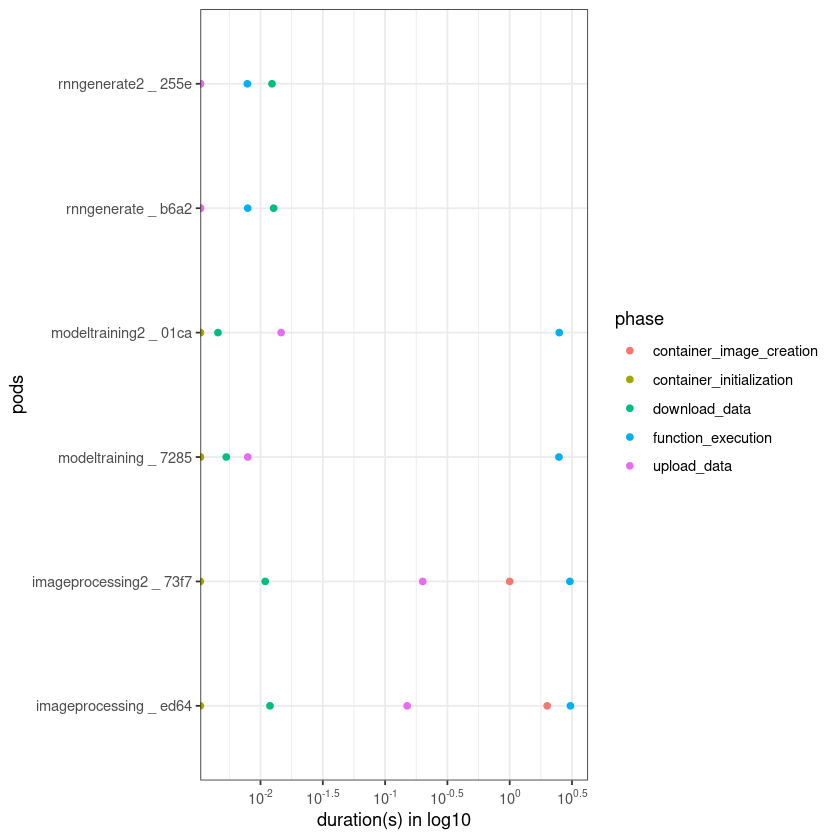

In [11]:
ggplot() +
    geom_point(data = df_plot, aes(x = duration, y = function_name, color = reason))+#, color = reason)) +
    labs(x = "duration(s) in log10", y = "pods", color = "phase") +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    theme_bw() +
    ggsave('full_geom_point_log10.png')